In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Load a model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 19.7MB/s]


In [ ]:
# model.train(data="/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment56/data.yaml", epochs=30)

In [ ]:
# my_model = YOLO("/content/runs/detect/train/weights/best.pt")

### inference

In [6]:
my_model = YOLO("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/license plate detection weights/best.pt")

In [8]:
results = my_model("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset", save=True)


image 1/4 /content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset/20240616_165128.jpg: 640x480 1 License-Plate, 356.0ms
image 2/4 /content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset/20240828_174306.jpg: 640x480 1 License-Plate, 163.3ms
image 3/4 /content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset/20241203_171414.jpg: 480x640 2 License-Plates, 169.8ms
image 4/4 /content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset/20241203_181409.jpg: 480x640 1 License-Plate, 157.4ms
Speed: 8.7ms preprocess, 211.6ms inference, 9.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


In [9]:
import os
# Get the list of all files and directories
path = "/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

Files and directories in ' /content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment57/Deep Text Recognition Benchmark/cars dataset ' :
['20240616_165128.jpg', '20240828_174306.jpg', '20241203_171414.jpg', '20241203_181409.jpg']


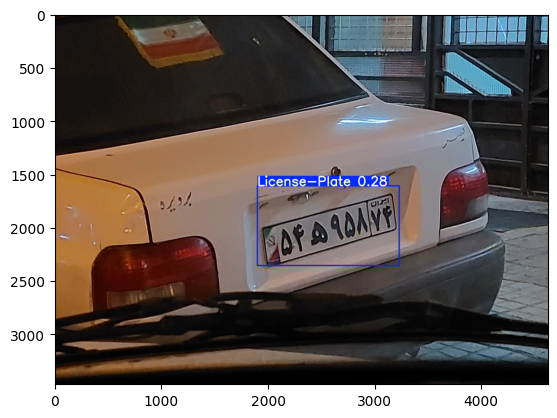

In [11]:
import cv2
import matplotlib.pyplot as plt

for file_name in dir_list:
    image = cv2.imread(f"/content/runs/detect/predict/{file_name}")
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    plt.imshow(image)

In [ ]:
# https://docs.ultralytics.com/models/yolov8/#can-i-benchmark-yolov8-models-for-performance

# Iterate over results to extract information
for result in results:
    # Get bounding boxes in [xmin, ymin, xmax, ymax] format
    boxes = result.boxes.xyxy.cpu().numpy()

    # Get class labels
    labels = [model.names[int(cls)] for cls in result.boxes.cls]

    # Get confidence scores
    confidences = result.boxes.conf.cpu().numpy()

    # Example: print results for each detected object
    for box, label, confidence in zip(boxes, labels, confidences):
        print(f"Box: {box}, Label: {label}, Confidence: {confidence}")

# If you're processing multiple images, the result would iterate through the list of results corresponding to each image.

Box: [       3465      1418.1        4105      1597.6], Label: person, Confidence: 0.7383361458778381
Box: [     348.79      1054.1      1486.2      1305.4], Label: person, Confidence: 0.7295820116996765


In [12]:
print("The bounding boxes in [xmin, ymin, xmax, ymax] format:")
i = 0
for result in results:
    print(f"\nimage {i}:")
    boxes = result.boxes.xyxy.cpu().numpy()
    for box in boxes:
        print(f"Box:{box}")

    i+=1

The bounding boxes in [xmin, ymin, xmax, ymax] format:

image 0:
Box:[       1161      1472.5        1794      1634.2]

image 1:
Box:[     1023.7      3484.2      1656.1      3638.8]

image 2:
Box:[       3465      1418.1        4105      1597.6]
Box:[     348.79      1054.1      1486.2      1305.4]

image 3:
Box:[     1898.6      1610.8      3228.3      2357.6]


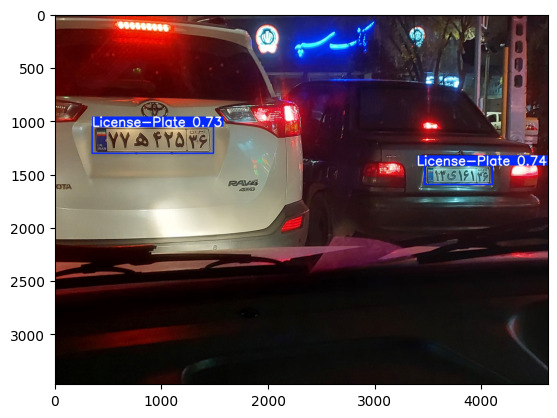

In [13]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread("/content/runs/detect/predict/20241203_171414.jpg")
image_1 = cv2.cvtColor(image_1 , cv2.COLOR_BGR2RGB)
plt.imshow(image_1)

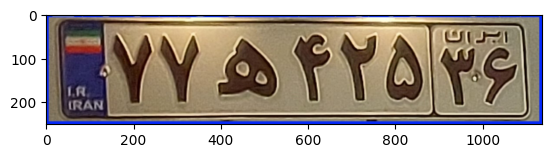

In [14]:
lp = image_1[1054:1305, 349:1486]
plt.imshow(lp)